This project is intended to showcase the growth of movies over the years.

The goal of this project is to allow the user to examine the movie data in relation to the budget/cost to make a motion picture and how highly rated it was, while comparing their revenues.

The visualizations were done through altair, a python library, using Jupyter notebook. The specific data utilized for this project is the movies file from the vega datasets. https://cdn.jsdelivr.net/npm/vega-datasets/data/ 

Within the data we find some key data element to present to the user: Title, US_Gross, Worldwide_Gross, Production_Budget, Release_Date, Major_Genre, Rotten_Tomatoes_Rating, IMDB_Rating which were leveraged to further allow the user to focus the data for additional insight.

In the final output the grammar of graphics framework is utilized to design and place these data elements into the appropriate parts of the visualization. Existing visuals on Kaggle were used as a reference point to aid in the outcome of this vizualization.

The reason why this task is performed was to explore the existing movie data to determine insights based on how highly the movie was rated and what the production costs involved. If needed the user could hover over each movie and can gather more detail regarding how much revenue they made. The data was explored and modified using the pandas library to only work with the data that were of interest to us. This would ensure clear and clean information being presented to the end users. 


There were a couple of low fidelity mockups that laid the basis for the design of the visualizations. These mockups were completed with the help and feedback from friends and family members. After brainstorming, it was decided to keep the visualization simple, if we just wanted to compare the ratings with the production costs. We would categorize the genres of the movies and simply look at the IMDB ratings over the production costs of each movie. It was also decided to have a slider or a dropdown to filter through the years. The relevant movie data would still be displayed if the user hovers over each movie in the chart. This was done to minimize clutter and to maximize insights in the visualization. Below is the final mockup of what the visualization would look like.

<div>
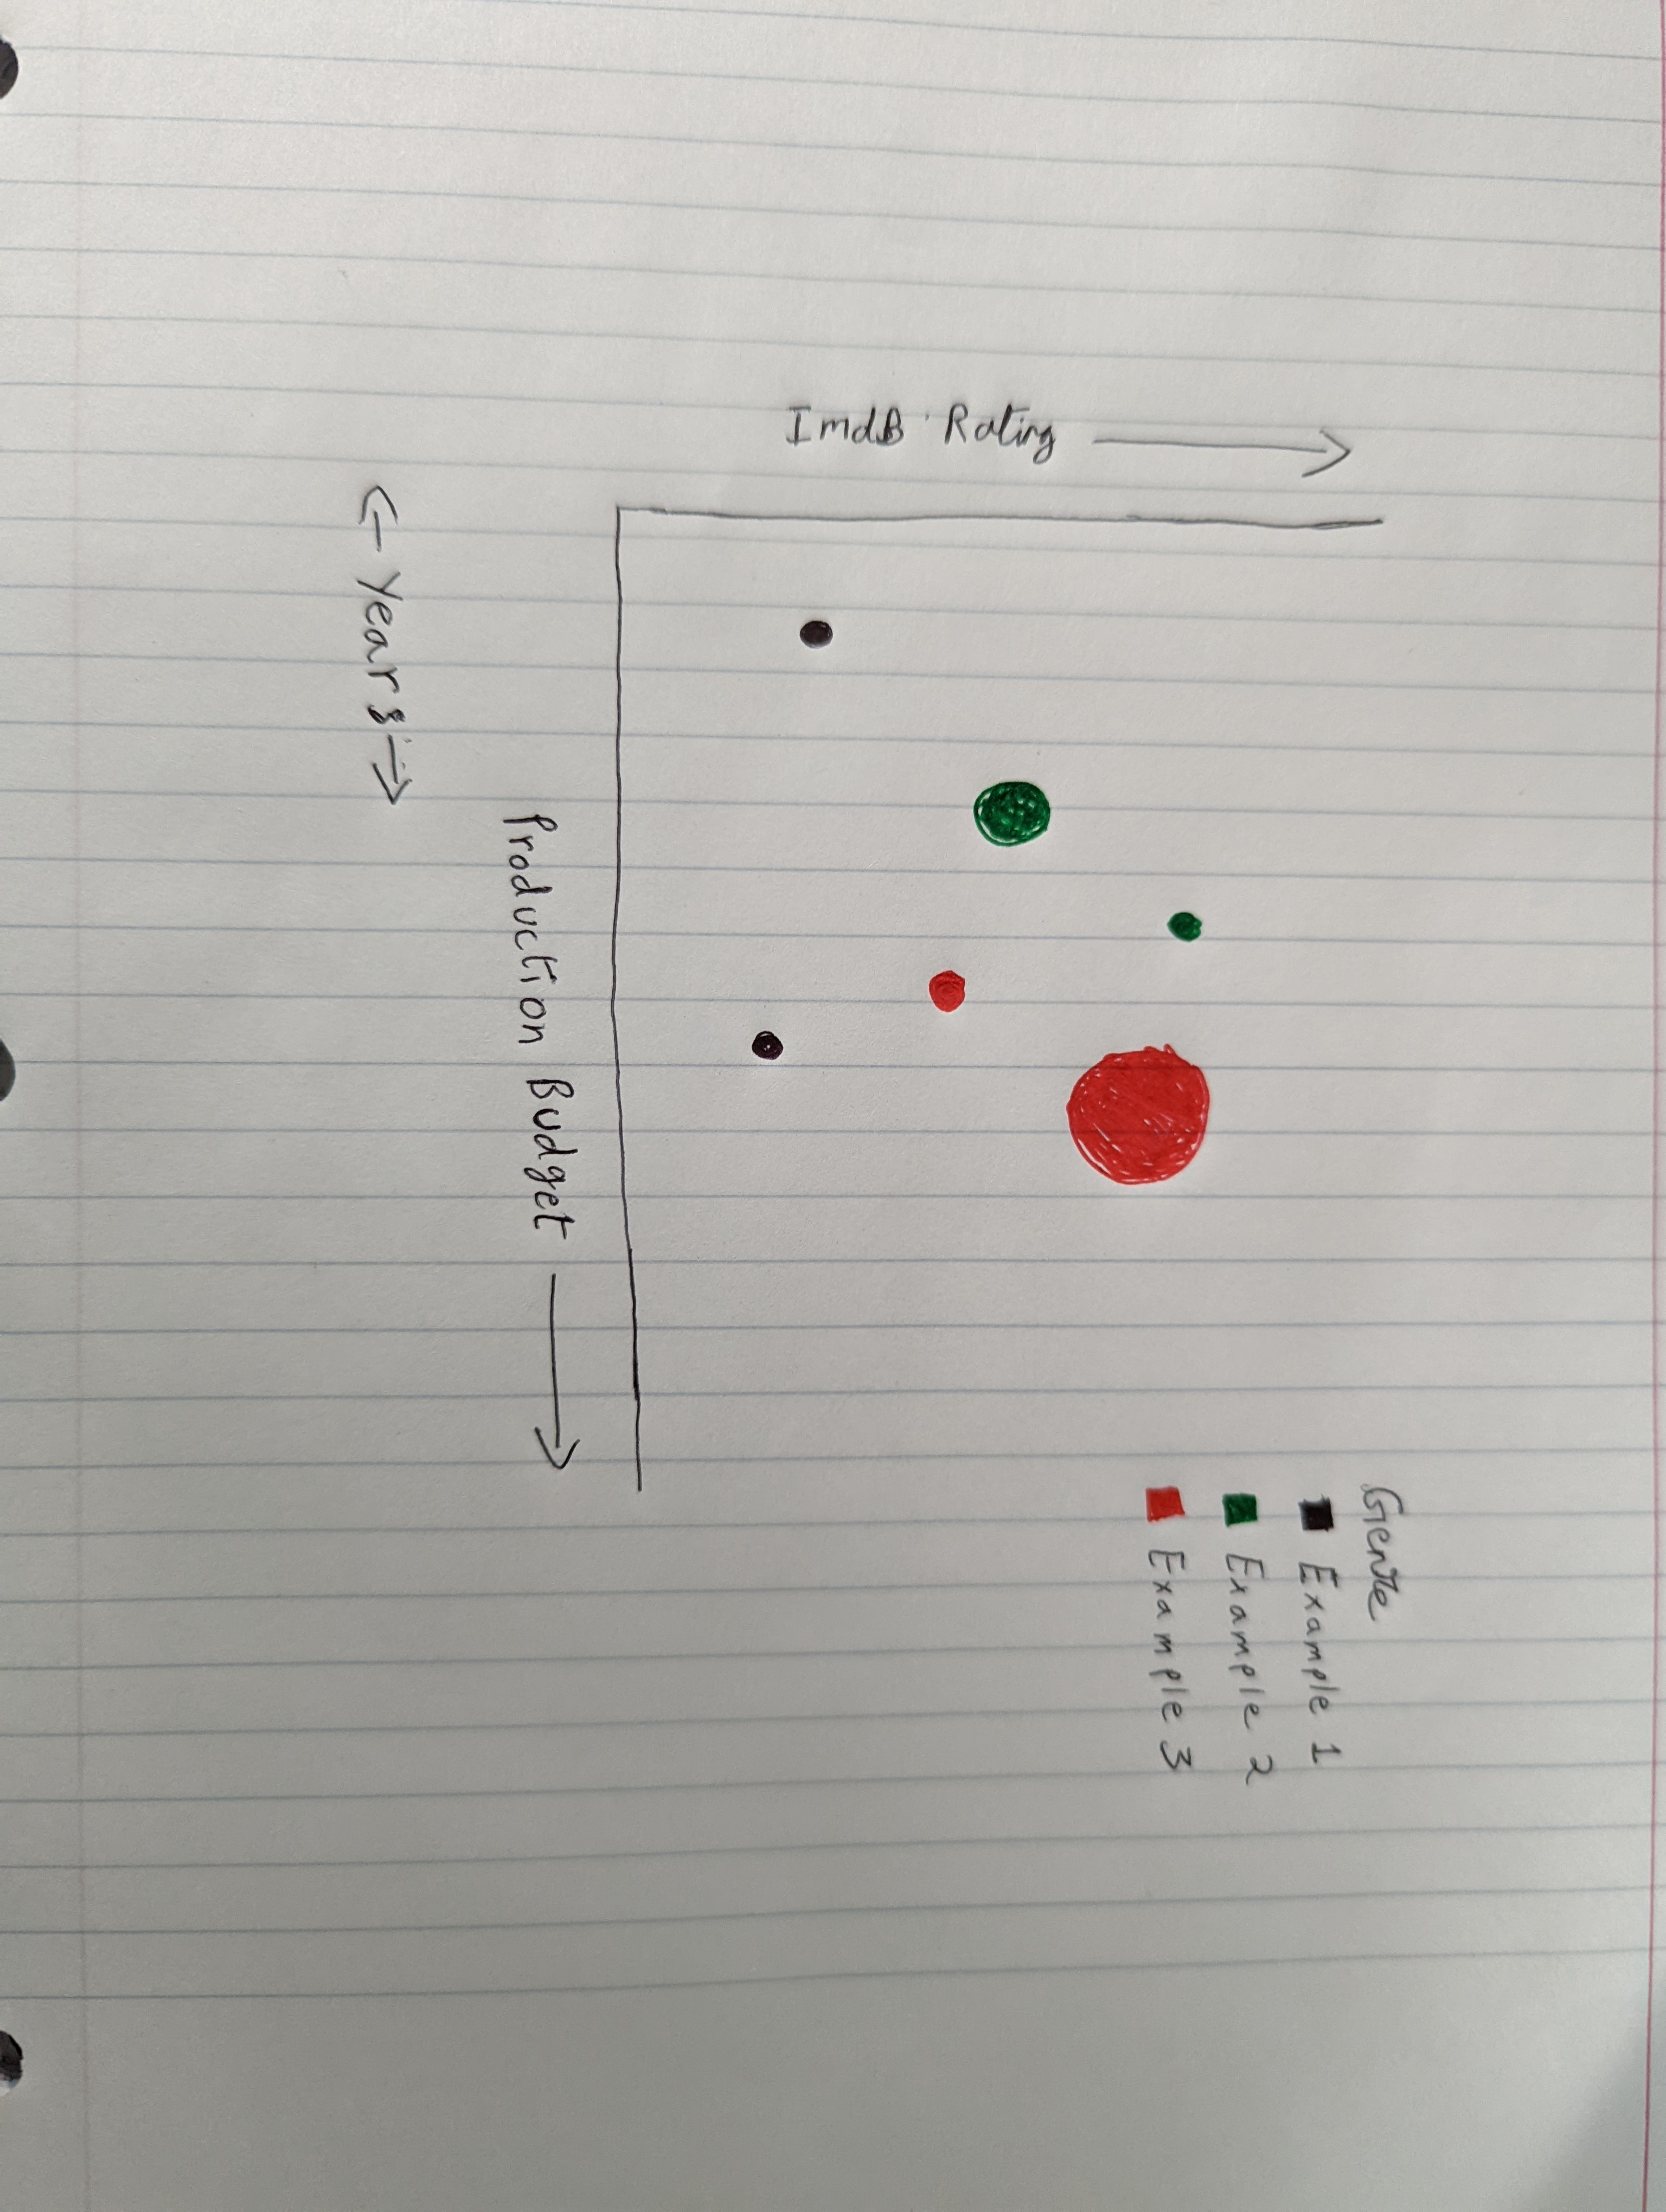
</div>

Here we take a look at a sample of the data and clean up some null values in certain columns that interest us

In [8]:
import pandas as pd
import altair as alt

# Importing the Vega Dataset
from vega_datasets import data as vega_data

link = vega_data.movies.url
df = pd.read_json(link)
pd.set_option("display.max_rows", None)

#add some data prep/transformations
def get_year(fulldate):
    return pd.to_datetime(fulldate, format='%b %d %Y').year

#add year for slide
df.insert(6, "Release_Year", df["Release_Date"].apply(get_year))

#replace null with None
df['Major_Genre'] = df['Major_Genre'].fillna("None")

df.head(5)

Creative_Type Director Distributor  IMDB_Rating  IMDB_Votes  \
0                  None     None    Gramercy          6.1      1071.0   
1                  None     None      Strand          6.9       207.0   
2                  None     None   Lionsgate          6.8       865.0   
3                  None     None   Fine Line          NaN         NaN   
4  Contemporary Fiction     None     Trimark          3.4       165.0   

  MPAA_Rating  Release_Year Major_Genre  Production_Budget Release_Date  \
0           R          1998        None          8000000.0  Jun 12 1998   
1           R          1998       Drama           300000.0  Aug 07 1998   
2        None          1998      Comedy           250000.0  Aug 28 1998   
3        None          1998      Comedy           300000.0  Sep 11 1998   
4           R          1998       Drama          1000000.0  Oct 09 1998   

   Rotten_Tomatoes_Rating  Running_Time_min               Source  \
0                     NaN               NaN                 None   
1                     NaN               NaN                 None   
2                     NaN               NaN                 None   
3                    13.0               NaN                 None   
4                    62.0               NaN  Original Screenplay   

                        Title  US_DVD_Sales   US_Gross  Worldwide_Gross  
0              The Land Girls           NaN   146083.0         146083.0  
1      First Love, Last Rites           NaN    10876.0          10876.0  
2  I Married a Strange Person           NaN   203134.0         203134.0  
3        Let's Talk About Sex           NaN   373615.0         373615.0  
4                        Slam           NaN  1009819.0        1087521.0

During exploration of the raw data it was decided that due to the distribution of the data we would instead focus on 10 years of movie data which the set of three end users agreed would be more than enough data to explore with. This was done so as to not overwhelm the users showing data with a long period of time. The intention was to show a brief snapshot of the movies over a reasonable amount of time.

In [9]:
#choose the data range
df_range = df[df['Release_Year'].between(2000, 2010)]

#Examine the data distribution selected range
chart = alt.Chart(df_range).mark_bar().encode(
        alt.Y('count(Title)'),
        alt.X('Release_Year')
).properties(title='10 Year Movie Data')

chart

alt.Chart(...)

Below is the final visualization produced for the project. Pandas library was used to clean up the data, while Altair library was used for the main visual elements in the vizualization.

The main features and characteristics of the design will be discussed for consideration of the tasks examined earlier.

Since the data was large and could overload the user a date slide was implemented at the bottom of the chart to allow the examination of each year of movie data, the 10 years of cleaner recent data was restricted to. Interactive elements were added to the design to assist the end user. The user could zoom and pan through the chart to focus on certain movies or outliers in the data shown. The vizualisation is represented with the IMDB ratings on the y-axis and the production budget on the x-axis. This scatter plot allowed the use of bublles to represent the movies from the data. The bubbles would be colored depending on the genre, alowing the user to examine trends among genres, if there were any. The bubbles size was made dependent on the US gross sales or internaional revenue to allow the user to focus on targets depending on their revenue. This would be in the form of a dropdown that allows the user to toggle between US and international gross. In addition, each bubble activates a tooltip on hover that allows the user to quickly see any other relevant information about the particular movie title.

This interactivity was an additional component that was added after some consultation with some users during the evaluation approach. The users appreciated the interactivity as the scatter plot didn't overwhelm them initially, as it was simple, but they were able to gather more insights with the hover tooltip. The dropdown wasn't present in the original chosen mockup and was also an addition to add to teh interactivity.

In [10]:
# slider selection
select_year = alt.selection_single(
    name='Select', fields=['Release_Year'], init={'Release_Year': 2010},
    bind=alt.binding_range(min=2000, max=2010, step=1, name='Year Of Release:')
)

#legend selection
legend_selection = alt.selection(type='multi', fields=['Major_Genre'], bind='legend')

#dynamic query
dropdown = alt.binding_select(options=["US_Gross","Worldwide_Gross"], name="Select a size variable:")

#dropdown that using dynamic query
dd_selection = alt.selection(type="single", fields=['column'], bind=dropdown, init={'column':'US_Gross'})

base = alt.Chart(df_range).transform_fold(
    ["US_Gross", "Worldwide_Gross"],
    as_=['column', 'Size Value']
).transform_filter(
    dd_selection
).mark_point(filled=True).encode(
    alt.X('Production_Budget',title='Production Budget'),
    alt.Y('IMDB_Rating', title='IMDB Rating'),
    alt.Color('Major_Genre', title='Genre', scale=alt.Scale(scheme='spectral')),
    opacity=alt.condition(legend_selection, alt.value(1), alt.value(0.3)),
    size=("Size Value:Q"),
    tooltip = [alt.Tooltip('Title:N', title='Movie Title'),
               alt.Tooltip('Production_Budget:Q', format=',.0f', title='Production Budget'),
               alt.Tooltip('Worldwide_Gross:Q', format=',.0f', title='Worldwide Gross'),
               alt.Tooltip('Major_Genre:N',title='Genre'),
               alt.Tooltip('IMDB_Rating:Q',title='IMDB Rating'),
               alt.Tooltip('Rotten_Tomatoes_Rating:Q',title='Rotten Tomatoes Rating')
              ] 
).properties(
    title='10 Years Of Movies from 2000 to 2010',
    width=680,
    height=500
).interactive(
).add_selection(
    legend_selection
).configure_title(
    fontSize=20,
    font='Courier',
    anchor='middle'
).configure_axis(
    labelFontSize=14,
    titleFontSize=14
).configure_legend(
    labelFontSize = 13
).add_selection(select_year).transform_filter(select_year).add_selection(dd_selection)

base

alt.Chart(...)

The vizualization was shown to the three users for evaluation and to seek their feedback. They were allowed to interact with the charts functionality, zooming and panning and also hovering over to view the tooltip.

The main questions that I had in mind for the users were:

1. Does the tool keep the data simple and easy to understand, yet still provide the user with new insights that they wouldn't have considered before?

2. What other insight would you have wanted to view or be made aware of?

3. What should change in this chart to give you a better picture or insight into movies over the years?

These were the questions presented to the users when asking for feedback. Overall they agreed the overall vizualisation chart was intuitive and the data was simple, yet still provided them with new insights. They didn't want to zoom a lot to view some of the smaller bubbles and would have appreciated a workaround. They also didn't see a big difference when switching the dropdown from US_Gross to Worldwide_Gross. The feedback I recieved was that the bubbles almost stay the same size when switching, even though the size value changes. This part of the vizualisation wasn't that intuitive and offered no new insights into teh movies. One user mentioned that they would have appreciated a seperate, more in depth chart looking at how certain genres fared over the years rather than individual movies.

Overall, I was able to deliver an approachable interactive look at movies from the year 2000 to 2010 based on their how highly rated they were and the production costs that went into them. I definitely would want to work on the feedback I recieved from the users such as focusing on eith US_Gross or Worldwide_Gross. Having them both in the dropdown, while being interactive, didn't really provide any new insights into the movies.It seems logical that a movie with a high production cost and highly rated would have similar outcomes in domestic and international revenue. I feel this dropdown should have been static focusing on one or the other. I would also want to apply a seperate chart with a more in depth look at how Genres have faired over the years.